Aula 3 do curso Hands on Data Science
Gráficos usando matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('dados/avocado.csv')
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <a list of 10 Patch objects>)

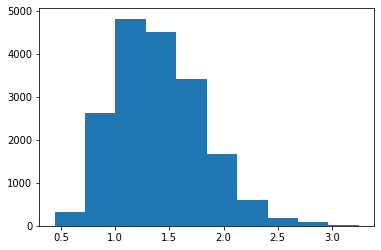

In [10]:
#Figura sem nenhum axes 
plt.figure()
#Criar figura 
plt.hist(df.AveragePrice)


In [15]:
#Agrupar os dados

dados = (
    df.loc[:,['year','AveragePrice']]
    .groupby('year')
    .mean()
)


In [16]:
dados

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


In [28]:
tamanho = dados.values.flatten().shape

In [26]:
objeto = list(dados.index)

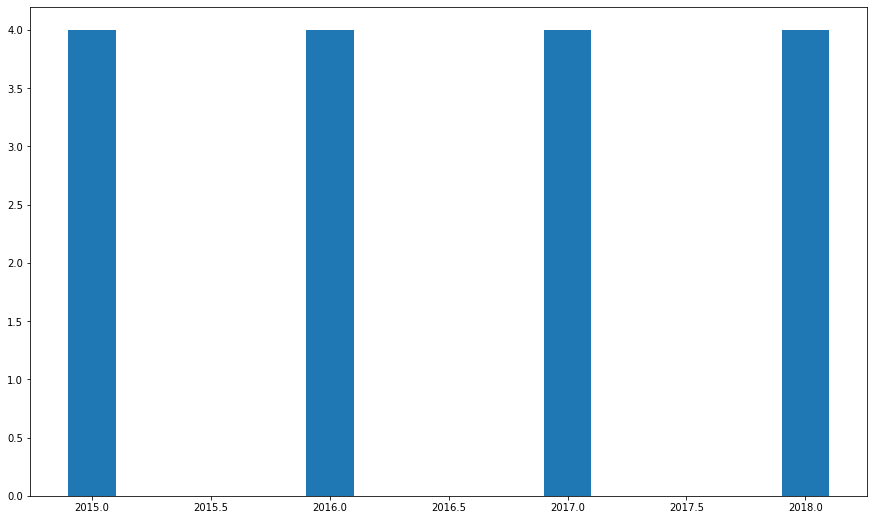

In [32]:
plt.figure(figsize = (15,9))
plt.bar(x = objeto,height = tamanho, width = 0.2)
plt.show()

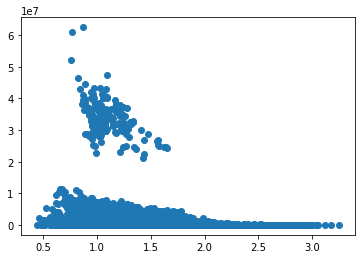

In [38]:
#Gráfico de dispersão
#Verificação de correlação entre os dados
#Quanto mais o eixo x aumenta maior o valor no eixo y
plt.figure()
plt.scatter(x = df['AveragePrice'],y = df['Total Volume'])
plt.show()

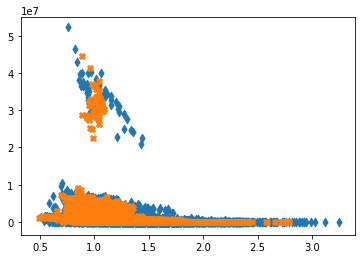

In [44]:
#Dois dados em um gráfico de dispersão
#Correlação entre os anos de 2015 e 2016 do preço do abacate 
plt.figure()
plt.scatter(x = df[df.year == 2016].AveragePrice,
            y = df[df.year == 2016]['Total Volume'],          
            c = 'tab:blue',
            marker = 'd')
plt.scatter(x = df[df.year == 2015].AveragePrice,
            y = df[df.year == 2015]['Total Volume'],          
            c = 'tab:orange',
            marker = 'X')


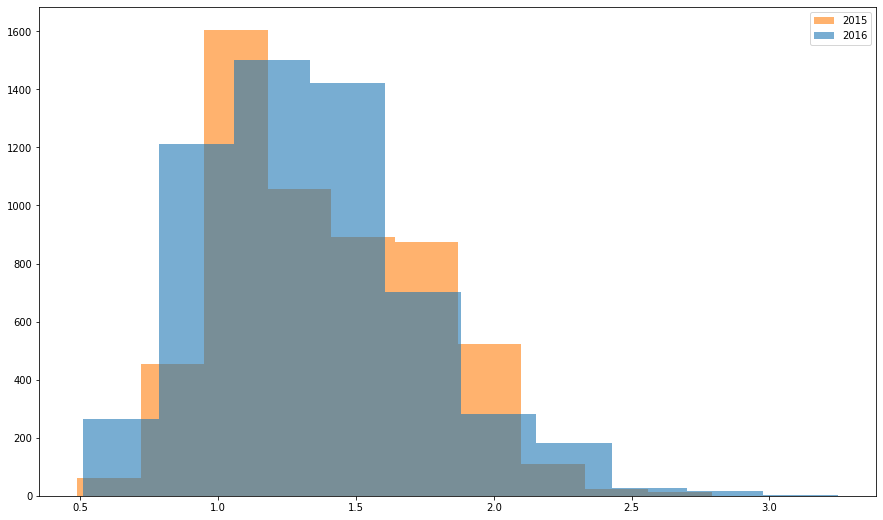

In [45]:

plt.figure(figsize=(15,9))
plt.hist(x = df[df['year'] == 2015]['AveragePrice'],color='tab:orange',alpha=0.6,label='2015')
plt.hist(x = df[df['year'] == 2016]['AveragePrice'],color='tab:blue',alpha=0.6,label='2016')
plt.legend()
plt.show()

In [47]:
media = df[df['year'] == 2015]["AveragePrice"].mean()

Text(0.5, 1.0, 'Média de preço do abacate')

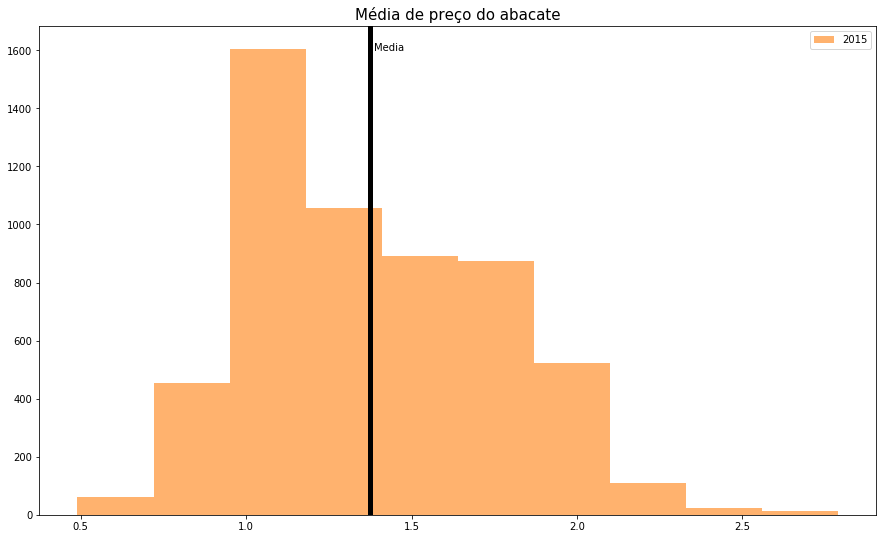

In [63]:

plt.figure(figsize=(15,9))
plt.hist(x = df[df['year'] == 2015]['AveragePrice'],color='tab:orange',alpha=0.6,label='2015')
plt.legend()
plt.axvline(x = media, color = 'black', lw = 5)
plt.text( x = media+0.01, y = 1600, s = 'Media')
plt.title('Média de preço do abacate',size = 15)

In [77]:
dados = (


  df[['Date','Total Bags','year','region']]
  .query('year == 2015')
  .query("region == 'LasVegas'")
  .drop(['year','region'],axis=1)
  .assign(Date = lambda x: pd.to_datetime(x.Date,infer_datetime_format=True))
  .sort_values('Date')

)

print(dados.shape)
dados

(104, 2)


,Date,Total Bags
1143,2015-01-04,58638.68
10269,2015-01-04,457.12
10268,2015-01-11,33.33
1142,2015-01-11,37144.36
1141,2015-01-18,33175.55
...,...,...
10220,2015-12-13,509.14
1093,2015-12-20,54103.94
10219,2015-12-20,407.88
10218,2015-12-27,1015.50


In [89]:
subplot_data = df[['AveragePrice','year']]
subplot_data

,AveragePrice,year
0,1.33,2015
1,1.35,2015
2,0.93,2015
3,1.08,2015
4,1.28,2015
...,...,...
18244,1.63,2018
18245,1.71,2018
18246,1.87,2018
18247,1.93,2018


<function matplotlib.pyplot.show(*args, **kw)>

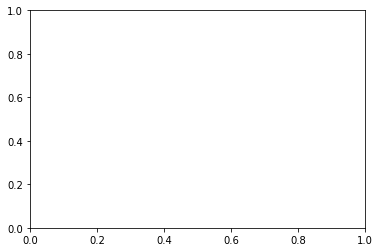

In [80]:
plt.subplots()
plt.show


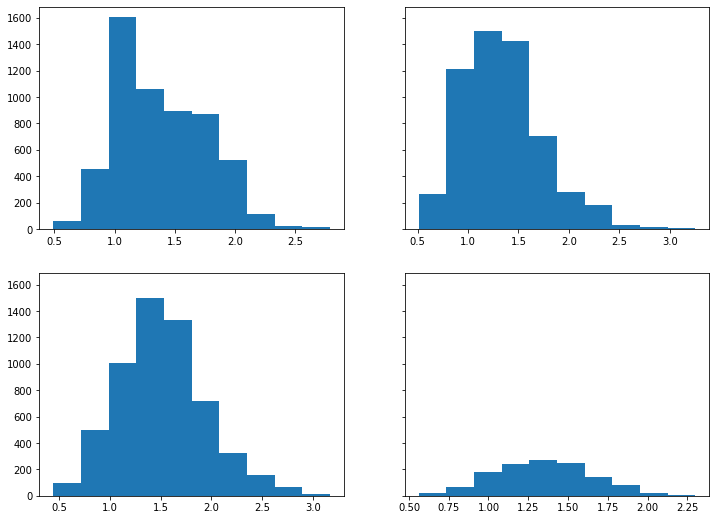

In [94]:
f, ax = plt.subplots(2,2,figsize = (12,9),sharey = True)
ax [0,0].hist(subplot_data.query('year == 2015').AveragePrice)
ax [0,1].hist(subplot_data.query('year == 2016').AveragePrice)

ax [1,0].hist(subplot_data.query('year == 2017').AveragePrice)

ax [1,1].hist(subplot_data.query('year == 2018').AveragePrice)
plt.show()

 Seaborn


In [96]:
import seaborn as sns


In [97]:
dados = df [['year','AveragePrice']]
dados.head()

,year,AveragePrice
0,2015,1.33
1,2015,1.35
2,2015,0.93
3,2015,1.08
4,2015,1.28


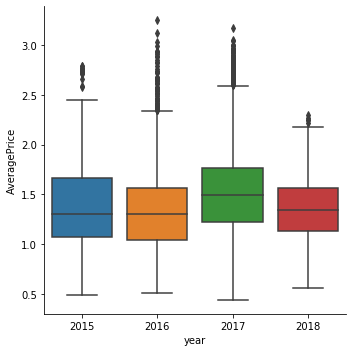

In [98]:
sns.catplot(x = 'year', y = 'AveragePrice', kind = 'box',data = dados)

In [103]:
dados18 = dados.query('year == 2018')
dados18

,year,AveragePrice
8478,2018,1.57
8479,2018,1.35
8480,2018,1.12
8481,2018,1.08
8482,2018,1.28
...,...,...
18244,2018,1.63
18245,2018,1.71
18246,2018,1.87
18247,2018,1.93


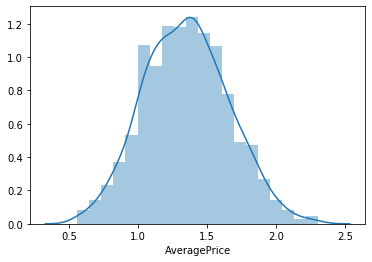

In [104]:
sns.distplot(dados18.AveragePrice,bins = 20,kde = True)